In [6]:
import sys
sys.path.append('../python_scripts')

import matplotlib.pyplot as plt
import mesa as ms
import pylab as p
import numpy as np
import os
from glob import glob

%matplotlib inline 
plt.rcParams['figure.figsize'] = 12, 6  # that's default image size for this interactive session

run_path= "/data/disk1/fragkos/mesa_projects/CE/runs/1.4M_15M/"

run_names = [d for d in os.listdir(run_path) if os.path.isdir(os.path.join(run_path, d))]

# run_names = [ '8M_50M_600R_sync0.95_Ofloor1m99_MdotOff', '8M_50M_600R_sync0.95_Ofloor1m99_MdotOn','8M_50M_800R_sync0.95_Ofloor1m99_MdotOff', '8M_50M_800R_sync0.95_Ofloor1m99_MdotOn',  '8M_50M_1000R_sync0.95_Ofloor1m99_MdotOff', '8M_50M_1000R_sync0.95_Ofloor1m99_MdotOn', '8M_50M_1400R_sync0.95_Ofloor1m99_MdotOff', '8M_50M_1400R_sync0.95_Ofloor1m99_MdotOn']
run_names = ['1.4M_15M_700R_sync0.95_Ofloor1m99_MdotOn']
print(run_names)

['1.4M_15M_700R_sync0.95_Ofloor1m99_MdotOn']


In [ ]:

a.SetParameters(cmap_dynamic_range=2.0, masses_TML=masses_TML, xvals_TML=xvals_TML,
               signed_log_cmap=False, Yaxis='log_radius', tau10=False, tau100=False, Xaxis="star_age",
               czones=True,cmap='jet', Variable='v_div_vesc')
a.Kippenhahn()



Process running in parallel on  48  cores
Process running in parallel on  48  cores
112
Process running in parallel on  48  cores
Process running in parallel on  48  cores
Process running in parallel on  48  cores
Process running in parallel on  48  cores
Process running in parallel on  48  cores
Process running in parallel on  48  cores
Process running in parallel on  48  cores
Process running in parallel on  48  cores


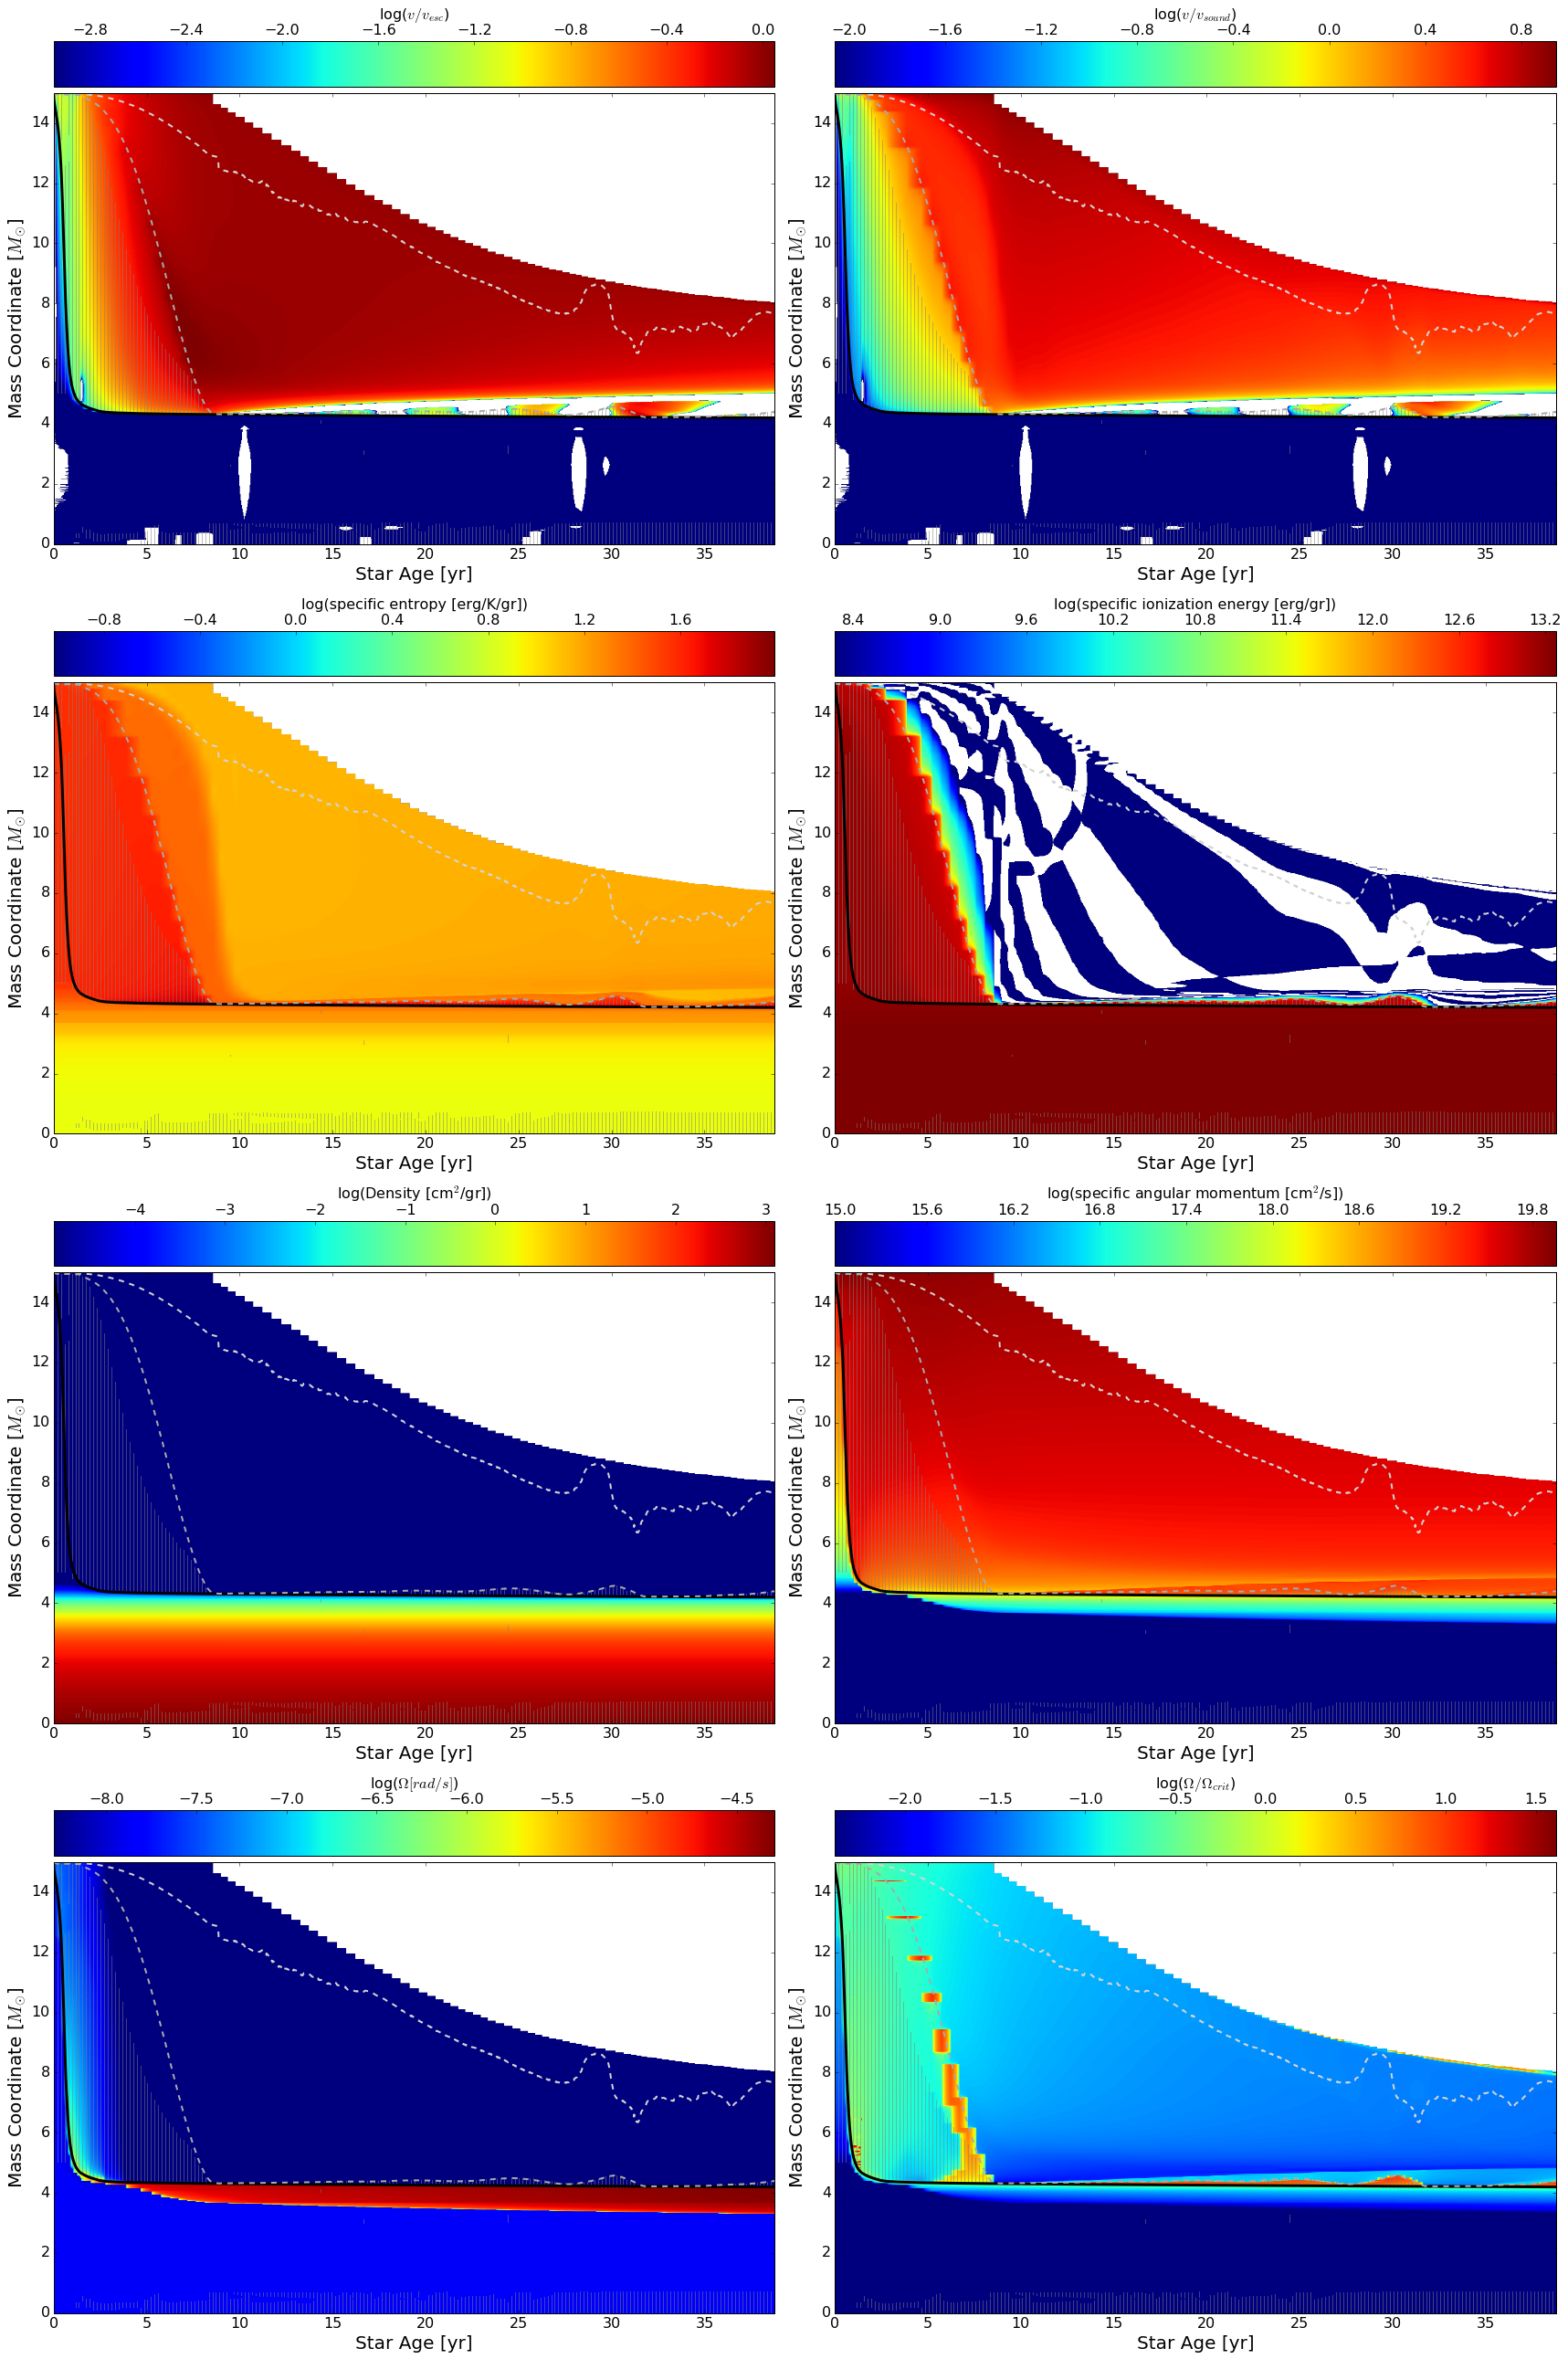

In [24]:
for run_name in run_names:
    data_path = run_path+run_name+"/LOGS/"
    a = ms.mesa(data_path=data_path, parallel=True, abundances=False, log_abundances = True, Yaxis='log_mass', Xaxis="log_inv_star_age",czones=False, Variable='v_div_vesc', orbit=True)
    print len(a.profiles)

    fig, ax = plt.subplots(4,2, figsize=(24, 36))

    # masses_TML=[13.,13.5,15.,16.,17., 18., 19.]
    # xvals_TML=[0.1,0.15,0.2,0.25,0.3,0.35, 0.4, 0.45, 0.5,0.55, 0.6]
    masses_TML=[3.0, 4., 4.5, 5.,6.,7.,8. , 9., 10., 11., 12.]
#     masses_TML=[11., 12.,13., 14.,15., 16., 17., 20.0, 30.0, 40.0]
    xvals_TML= [0.1,0.15,0.2,0.25,0.3,0.35, 0.4]



    a.SetParameters(cmap_dynamic_range=3.0, masses_TML=masses_TML, xvals_TML=xvals_TML,
                   signed_log_cmap=False, Yaxis='mass', tau10=True, tau100=True, Xaxis="star_age",
                   czones=True,cmap='jet', Variable='v_div_vesc')
    a.Kippenhahn(ax[0,0])

    a.SetParameters(cmap_dynamic_range=3.0, signed_log_cmap=False, Variable='v_div_csound')
    a.Kippenhahn(ax[0,1])


    a.SetParameters(cmap_dynamic_range=3.0, signed_log_cmap=False, Variable='entropy')
    a.Kippenhahn(ax[1,0])


    a.SetParameters(cmap_dynamic_range=5.0, signed_log_cmap=False, Variable='ionization_energy')
    a.Kippenhahn(ax[1,1])

    a.SetParameters(cmap_dynamic_range=8.0, signed_log_cmap=False, Variable='density')
    a.Kippenhahn(ax[2,0])

    a.SetParameters(cmap_dynamic_range=5.0, signed_log_cmap=False, Variable='j_rot')
    a.Kippenhahn(ax[2,1])

    a.SetParameters(cmap_dynamic_range=4.0, signed_log_cmap=False, Variable='omega')
    a.Kippenhahn(ax[3,0])

    a.SetParameters(cmap_dynamic_range=4.0, signed_log_cmap=False, Variable='omega_div_omega_crit')
    a.Kippenhahn(ax[3,1])

    plt.tight_layout()
    plt.savefig("../figures/"+run_name+'.pdf')
    plt.show()
